In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AB_US_2020.csv',usecols=['id','name','host_id','latitude','longitude','room_type','price',
                                             'minimum_nights','number_of_reviews','last_review',
                                             'reviews_per_month','calculated_host_listings_count',
                                             'availability_365','city'])
df.shape,
#df.dtypes,
#df.head()

((226030, 14),)

In [3]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.260300e+05,2.260300e+05,226030.000000,226030.000000,226030.000000,2.260300e+05,226030.000000,177428.00000,226030.000000,226030.000000
mean,2.547176e+07,9.352385e+07,35.662829,-103.220662,219.716529,4.525490e+02,34.506530,1.43145,16.698562,159.314856
std,1.317814e+07,9.827422e+07,6.849855,26.222091,570.353609,2.103376e+05,63.602914,1.68321,51.068966,140.179628
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,0.000000,0.01000,1.000000,0.000000
25%,1.515890e+07,1.399275e+07,32.761783,-118.598115,75.000000,1.000000e+00,1.000000,0.23000,1.000000,0.000000
50%,2.590916e+07,5.138266e+07,37.261125,-97.817200,121.000000,2.000000e+00,8.000000,0.81000,2.000000,140.000000
75%,3.772624e+07,1.497179e+08,40.724038,-76.919322,201.000000,7.000000e+00,39.000000,2.06000,6.000000,311.000000
max,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.06000,593.000000,365.000000


In [4]:
df.shape

(226030, 14)

In [5]:
print(len(df['id']),len(df['id'].unique()))

226030 226029


In [6]:
catego_cols = df.columns[df.dtypes == np.object]
numeric_cols = df.columns[((df.dtypes == np.int64) | (df.dtypes == np.float64))]

In [7]:
#catego_cols.to_list(), numeric_cols.to_list()

In [8]:
df.isna().sum() #Cleanup 1, Checking missing values

id                                    0
name                                 28
host_id                               0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       48602
reviews_per_month                 48602
calculated_host_listings_count        0
availability_365                      0
city                                  0
dtype: int64

In [9]:
df_nomisses = df.dropna(axis=0) # Cleanup 2, Dropping rows with missing values

In [10]:
df_nomisses.shape

(177417, 14)

In [11]:
df_nomisses.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.774170e+05,1.774170e+05,177417.000000,177417.000000,177417.000000,1.774170e+05,177417.000000,177417.000000,177417.000000,177417.000000
mean,2.349838e+07,8.449514e+07,35.728524,-103.248849,184.520982,5.724051e+02,43.961047,1.431516,11.392042,157.955230
std,1.263606e+07,9.067045e+07,6.789515,25.967261,430.609609,2.374118e+05,68.834215,1.683234,33.376735,138.128959
min,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000e+00,1.000000,0.010000,1.000000,0.000000
25%,1.368971e+07,1.212400e+07,32.770550,-121.577950,75.000000,1.000000e+00,4.000000,0.230000,1.000000,1.000000
50%,2.338746e+07,4.673526e+07,37.259170,-104.876340,116.000000,2.000000e+00,16.000000,0.810000,2.000000,139.000000
75%,3.446787e+07,1.339236e+08,40.722140,-76.987360,195.000000,5.000000e+00,54.000000,2.060000,5.000000,305.000000
max,4.549250e+07,3.679176e+08,47.734620,-70.995950,24999.000000,1.000000e+08,966.000000,44.060000,393.000000,365.000000


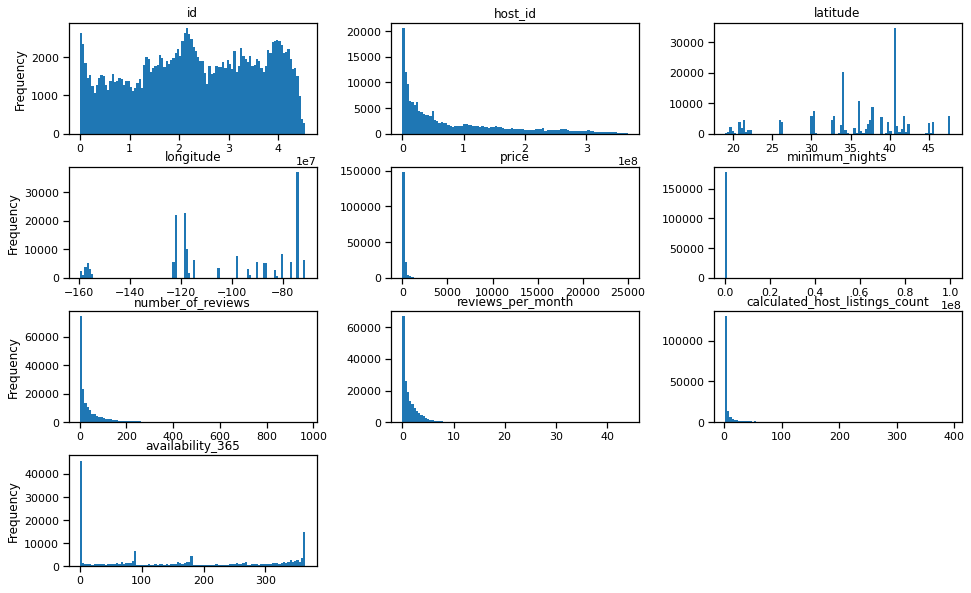

In [12]:
import seaborn as sns
sns.set_context('notebook')

axList = df_nomisses[numeric_cols].hist(bins=100,figsize=(16,10),grid=False)

for ax in axList.flatten():
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

In [13]:
lower_bound = .25
upper_bound = .75

df_nomisses_nooutliers = df_nomisses[df_nomisses['price'].between(df_nomisses['price'].quantile(lower_bound), 
                                                                  df_nomisses['price'].quantile(upper_bound), inclusive=True)]
df_nomisses_nooutliers = df_nomisses_nooutliers[df_nomisses_nooutliers['number_of_reviews'] > 0]
df_nomisses_nooutliers = df_nomisses_nooutliers[df_nomisses_nooutliers['calculated_host_listings_count'] < 25]
df_nomisses_nooutliers = df_nomisses_nooutliers[df_nomisses_nooutliers['number_of_reviews'] < 200]
df_nomisses_nooutliers = df_nomisses_nooutliers[df_nomisses_nooutliers['minimum_nights'] < 10]
df_nomisses_nooutliers = df_nomisses_nooutliers[df_nomisses_nooutliers['reviews_per_month'] < 5]
df_nomisses_nooutliers = df_nomisses_nooutliers[df_nomisses_nooutliers['availability_365'] > 0 ]
df_nomisses_nooutliers = df_nomisses_nooutliers[df_nomisses_nooutliers['availability_365'] < 365 ]

In [14]:
df_nomisses_nooutliers.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.931400e+04,3.931400e+04,39314.000000,39314.000000,39314.000000,39314.000000,39314.000000,39314.000000,39314.000000,39314.000000
mean,2.508464e+07,9.603103e+07,35.307876,-103.336699,122.657399,2.345449,46.976090,1.685403,3.416442,188.012540
std,1.261398e+07,9.715114e+07,7.179186,26.460394,33.619877,1.411112,47.511427,1.247594,4.427795,116.436513
min,1.940000e+03,2.300000e+01,19.035670,-159.711430,75.000000,1.000000,1.000000,0.010000,1.000000,1.000000
25%,1.570941e+07,1.485250e+07,30.343260,-121.905600,95.000000,1.000000,9.000000,0.620000,1.000000,86.000000
50%,2.578007e+07,5.638576e+07,36.214185,-97.743875,119.000000,2.000000,30.000000,1.450000,1.000000,175.000000
75%,3.623104e+07,1.576336e+08,40.719318,-77.061442,150.000000,3.000000,71.000000,2.540000,4.000000,306.000000
max,4.549250e+07,3.679176e+08,47.734620,-70.995950,195.000000,9.000000,199.000000,4.990000,24.000000,364.000000


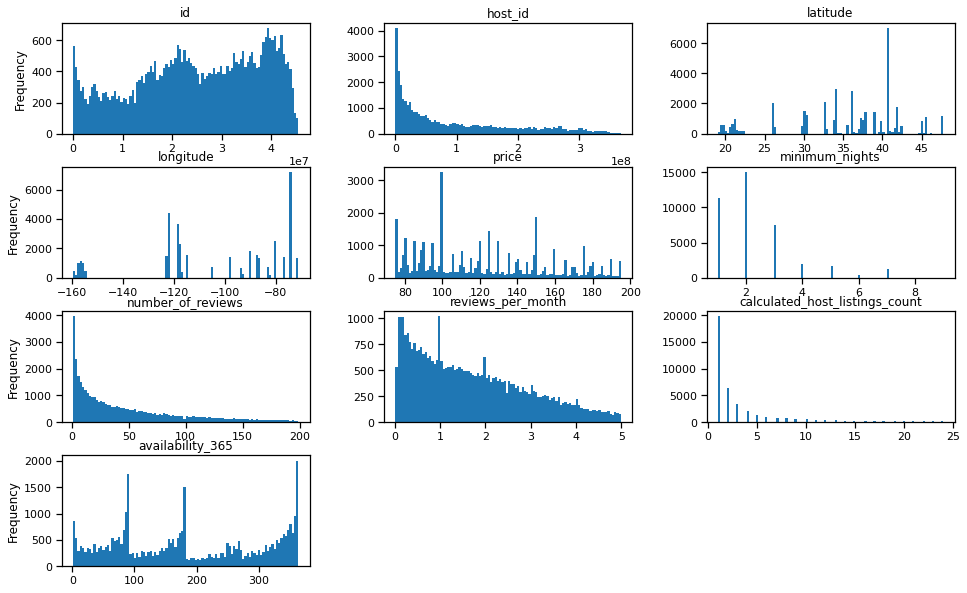

In [15]:
sns.set_context('notebook')

axList = df_nomisses_nooutliers[numeric_cols].hist(bins=100,figsize=(16,10),grid=False)

for ax in axList.flatten():     
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

In [16]:
#fig, axes = plt.subplots(nrows=2, ncols=4)
#aux = 0
#fig.set_figheight(17)
#fig.set_figwidth(25)
#for row in axes:
#    for col in row:
#        df_nomisses_nooutliers[numeric_cols[aux]].plot(kind='kde',ax=col)
#        if numeric_cols[aux] not in ['latitude','longitude']:
#            col.set_xlim(0,df_nomisses_nooutliers[numeric_cols[aux]].max()+df_nomisses_nooutliers[numeric_cols[aux]].max()*0.25)
#        col.set_title(numeric_cols[aux] +' Distribution',fontsize=16,fontweight='bold')
#        aux+=1

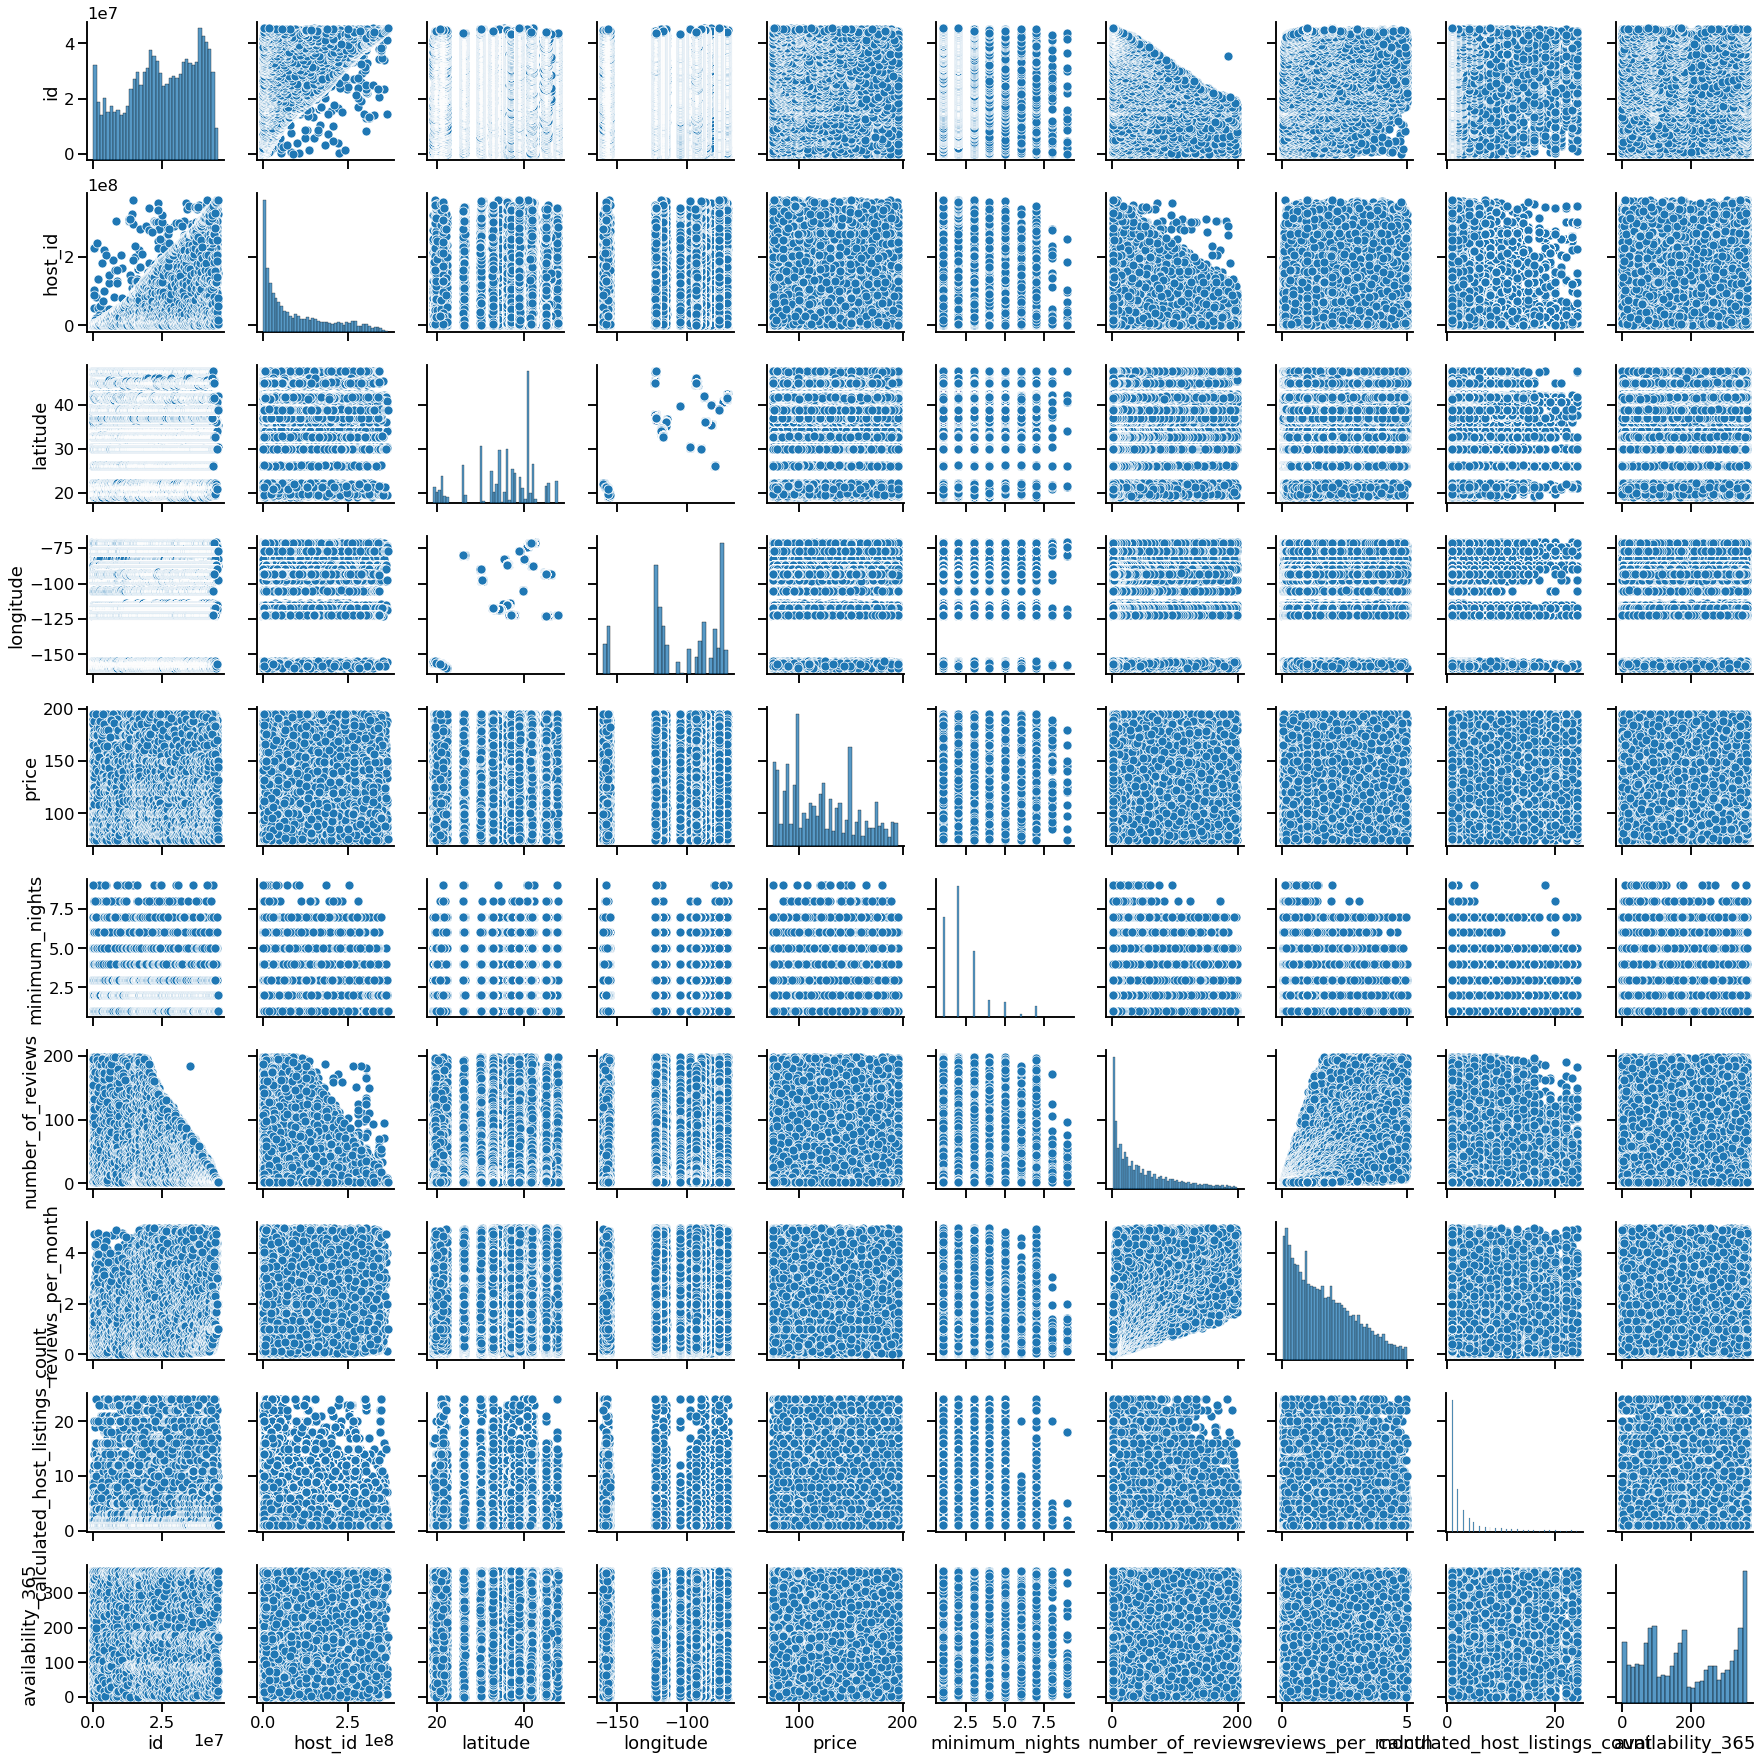

In [17]:
#df_nomisses_nooutliers[numeric_cols]
sns.set_context('talk')
sns.pairplot(df_nomisses_nooutliers[numeric_cols]);

In [18]:
#catego_cols.to_list()

In [19]:
#df_nomisses_nooutliers.groupby('city').mean()

In [20]:
#df_nomisses_nooutliers[df_nomisses_nooutliers['city']=='San Diego'].describe()

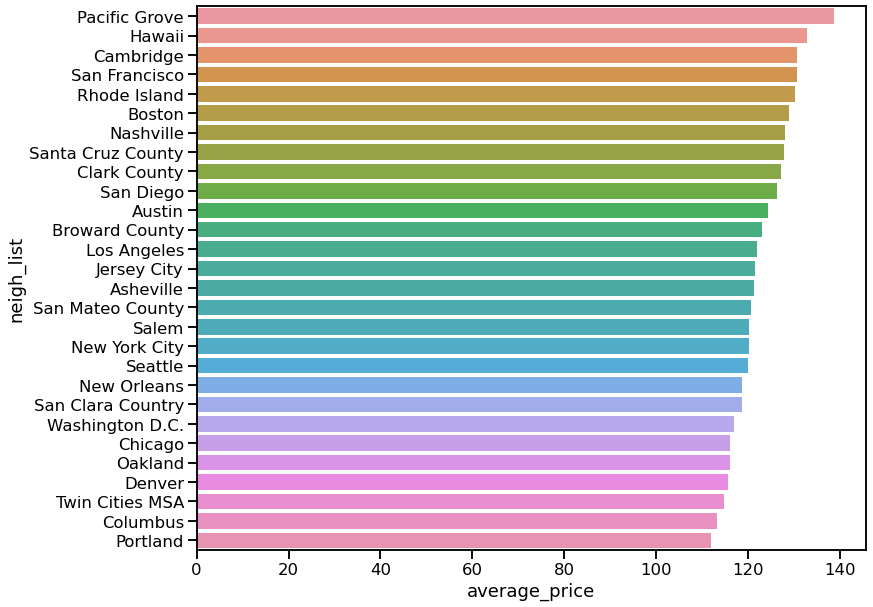

In [21]:
neigh_list = list(df_nomisses_nooutliers['city'].unique())

average_price=[]

for i in neigh_list:
    x=df_nomisses_nooutliers[df_nomisses_nooutliers.city==i]
    neigh_average=sum(x.price)/len(x)
    average_price.append(neigh_average)

df1=pd.DataFrame({'neigh_list':neigh_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(12,10))
ax=sns.barplot(x=sorted_data.average_price,y=sorted_data.neigh_list)

Index(['id', 'name', 'host_id', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

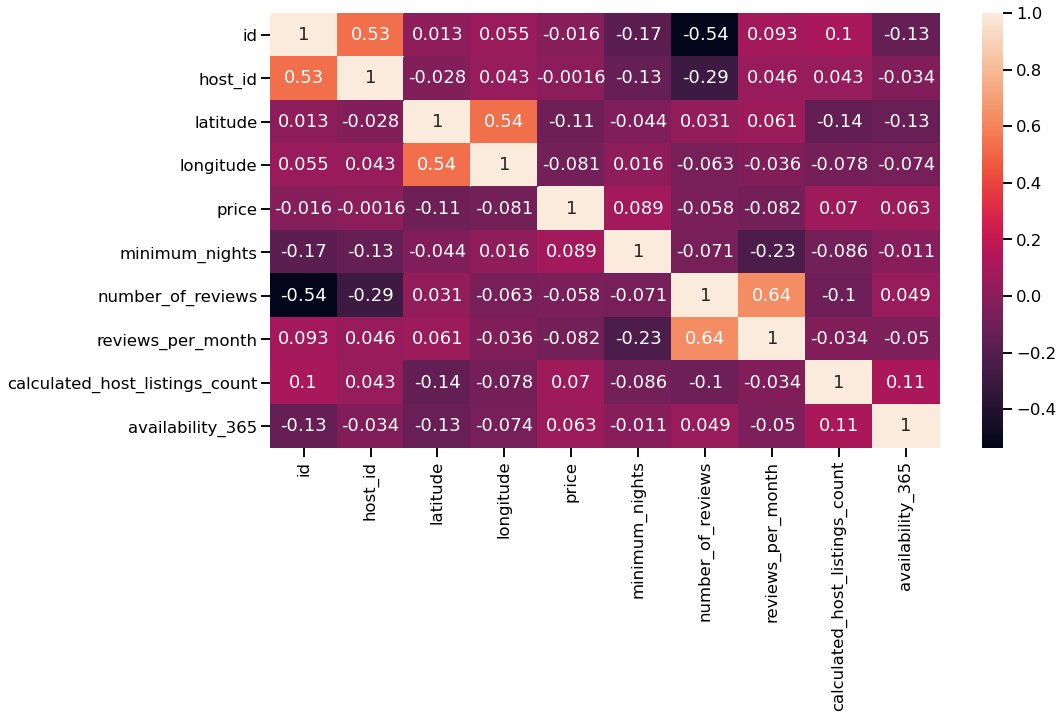

In [22]:
corr = df_nomisses_nooutliers.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_nomisses_nooutliers.columns

<Figure size 720x504 with 0 Axes>

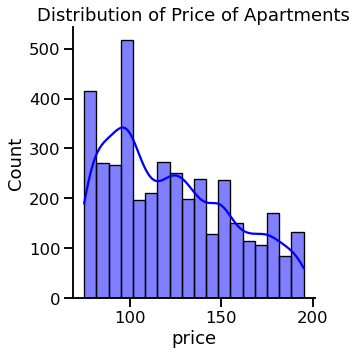

In [23]:
plt.figure(figsize=(10,7))
sns.displot(df_nomisses_nooutliers[df_nomisses_nooutliers['city']=='Los Angeles'], x='price',color='b', kde=True)
plt.title("Distribution of Price of Apartments")
plt.show()

In [24]:
import scipy.stats as st
st.shapiro(df_nomisses_nooutliers[df_nomisses_nooutliers['city']=='Los Angeles'].price)

ShapiroResult(statistic=0.944286048412323, pvalue=2.839004859988785e-36)